In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
from tensorflow.keras.applications import VGG16, ResNet50,EfficientNetB0
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input as vgg_preprocess
from tensorflow.keras.applications.resnet50 import preprocess_input as resnet_preprocess
from tensorflow.keras.applications.efficientnet import preprocess_input as efficientnet_preprocess
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
import cv2
import os
import joblib

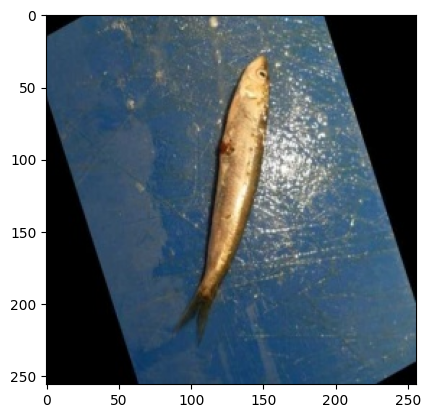

In [ ]:
# load the image
img=image.load_img("/content/drive/MyDrive/project mini/fish/data/train/fish sea_food black_sea_sprat/01F5NP0WCYCF.jpg")
plt.imshow(img) # show the image

In [ ]:
array=img_to_array(img) # change the image to numerical form 
array.shape  # to check image are numerical form

(256, 256, 3)

array([[[0, 1, 0],
        [0, 1, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 1, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 1],
        [0, 0, 1],
        [0, 0, 1]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [4, 0, 0],
        [4, 0, 0],
        [2, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [5, 0, 0],
        [4, 0, 0],
        [4, 0, 0]]], dtype=uint8)
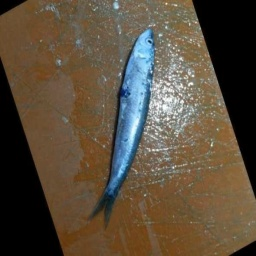

In [ ]:
# read the image
cv2.imread("/content/drive/MyDrive/project mini/fish/data/train/fish sea_food black_sea_sprat/01F5NP0WCYCF.jpg")

In [ ]:
# DATA AUGMENTATION
train = ImageDataGenerator( rescale=1./255,         # Normalize pixel values to [0,1]
                            rotation_range=20,      # Randomly rotate images by ±20 degrees
                            width_shift_range=0.2,  # Shift images horizontally by ±20% of width
                            height_shift_range=0.2, # Shift images vertically by ±20% of height
                            shear_range=0.2,        # Apply shearing transformations
                            zoom_range=0.2,         # Randomly zoom images by ±20%
                            horizontal_flip=True,   # Flip images horizontally
                            fill_mode='nearest'     # Fill pixels after transformation using 'nearest' mode
                            )
validation=ImageDataGenerator(rescale=1/255,
                              rotation_range=20,
                              width_shift_range=0.2,
                              height_shift_range=0.2,
                              shear_range=0.2,
                              zoom_range=0.2,
                              horizontal_flip=True,
                              fill_mode='nearest'
                              )

In [ ]:
# load data form directory
train_dataset=train.flow_from_directory('/content/drive/MyDrive/project mini/fish/data/train',# Path to training data
                                        target_size=(300,300),       # Resize images to 300x300
                                        batch_size=32,               # Number of images per batch
                                        class_mode='categorical'     # Multi-class classification
                                        )
validation_dataset=validation.flow_from_directory('/content/drive/MyDrive/project mini/fish/data/val',# Path to validation data
                                        target_size=(300,300),
                                        batch_size=32,
                                        class_mode='categorical'
                                        )

Found 6225 images belonging to 11 classes.
Found 1092 images belonging to 11 classes.


In [ ]:
a=train_dataset.classes_indices

In [ ]:
# changing the value of index and key of dictionary

image=a
swap={}
for key,value in image.items():
    swap[value]=key
print(swap)

{0: 'animal fish', 1: 'animal fish bass', 2: 'fish sea_food black_sea_sprat', 3: 'fish sea_food gilt_head_bream', 4: 'fish sea_food hourse_mackerel', 5: 'fish sea_food red_mullet', 6: 'fish sea_food red_sea_bream', 7: 'fish sea_food sea_bass', 8: 'fish sea_food shrimp', 9: 'fish sea_food striped_red_mullet', 10: 'fish sea_food trout'}


In [ ]:
joblib.dump(swap,"swaped.keras")# save the swaped the index

['swaped.keras']

In [ ]:
label=joblib.load("D:/Desktop/fish/data/swaped.keras")# load the swaped.keras

## CNN Architecture

In [ ]:
# structure of the model
model=tf.keras.models.Sequential([tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=(300,300,3)),
                                  tf.keras.layers.MaxPool2D(2,2),
                                  tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
                                  tf.keras.layers.MaxPool2D(2,2),
                                  tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
                                  tf.keras.layers.MaxPool2D(2,2),
                                  tf.keras.layers.Flatten(),
                                  tf.keras.layers.Dense(3072,activation='relu'),
                                  tf.keras.layers.Dense(2048,activation='relu'),
                                  tf.keras.layers.Dense(1024,activation='relu'),
                                  tf.keras.layers.Dense(len(train_dataset.class_indices),activation='softmax')
                                  ])

c:\Users\Welcome\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# complie the model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
import math

# Check total samples
total_train_samples = len(train_dataset.filenames)
total_val_samples = len(validation_dataset.filenames)

# Calculate steps_per_epoch and validation_steps
batch_size=32
steps_per_epoch = math.ceil(total_train_samples / batch_size)
validation_steps = math.ceil(total_val_samples / batch_size)


In [ ]:
total_train_samples

6225

In [ ]:
steps_per_epoch

13

In [ ]:
# train the model
model_fit = model.fit(
    train_dataset, # train dataset
    steps_per_epoch=steps_per_epoch,# processing the size of per step of epoch
    epochs=40, # total steps of epochs
    validation_data=validation_dataset,# validation dataset
    validation_steps=validation_steps # validation steps
)

Epoch 1/40
13/13 ━━━━━━━━━━━━━━━━━━━━ 63s 4s/step - accuracy: 0.8508 - loss: 0.3849 - val_accuracy: 0.9375 - val_loss: 0.1781
Epoch 2/40
13/13 ━━━━━━━━━━━━━━━━━━━━ 38s 3s/step - accuracy: 0.8983 - loss: 0.2956 - val_accuracy: 0.8854 - val_loss: 0.4668
Epoch 3/40
13/13 ━━━━━━━━━━━━━━━━━━━━ 37s 3s/step - accuracy: 0.8861 - loss: 0.3285 - val_accuracy: 0.8542 - val_loss: 0.3539
Epoch 4/40
13/13 ━━━━━━━━━━━━━━━━━━━━ 35s 3s/step - accuracy: 0.8834 - loss: 0.3266 - val_accuracy: 0.8958 - val_loss: 0.3393
Epoch 5/40
13/13 ━━━━━━━━━━━━━━━━━━━━ 35s 3s/step - accuracy: 0.9091 - loss: 0.2476 - val_accuracy: 0.9583 - val_loss: 0.1208
Epoch 6/40
13/13 ━━━━━━━━━━━━━━━━━━━━ 35s 3s/step - accuracy: 0.9270 - loss: 0.2268 - val_accuracy: 0.9375 - val_loss: 0.2113
Epoch 7/40
13/13 ━━━━━━━━━━━━━━━━━━━━ 35s 3s/step - accuracy: 0.9026 - loss: 0.2695 - val_accuracy: 0.9167 - val_loss: 0.3041
Epoch 8/40
13/13 ━━━━━━━━━━━━━━━━━━━━ 35s 3s/step - accuracy: 0.8984 - loss: 0.2222 - val_accuracy: 0.8958 - val_loss:

In [ ]:
import joblib

joblib.dump(model_fit.history,"training_history.sav")# save the history of model

['training_history.sav']

In [ ]:
joblib .load("training_history.sav")#load history of model

{'accuracy': [0.8653846383094788,
  0.8990384340286255,
  0.8942307829856873,
  0.8822115659713745,
  0.895261824131012,
  0.9182692170143127,
  0.90625,
  0.9158653616905212,
  0.9206730723381042,
  0.9399038553237915,
  0.9278846383094788,
  0.9254807829856873,
  0.8509615659713745,
  0.9375,
  0.9230769276618958,
  0.0,
  0.9230769276618958,
  0.90625,
  0.9276807904243469,
  0.9206730723381042,
  0.9158653616905212,
  0.9134615659713745,
  0.9254807829856873,
  0.8894230723381042,
  0.9254807829856873,
  0.9086538553237915,
  0.9038461446762085,
  0.9471153616905212,
  0.9399038553237915,
  0.9591346383094788,
  0.932692289352417,
  0.0,
  0.9495192170143127,
  0.9158653616905212,
  0.9375,
  0.9350961446762085,
  0.9399038553237915,
  0.9254807829856873,
  0.9278846383094788,
  0.9399038553237915],
 'loss': [0.3289859890937805,
  0.2917705774307251,
  0.3159727454185486,
  0.32841870188713074,
  0.26699772477149963,
  0.24981889128684998,
  0.2517464756965637,
  0.1953144371509552

In [ ]:
model_save=model.save("saved_model.keras")# save the model

In [ ]:
# model load
loaded_model = load_model("saved_model.keras")

c:\Users\Welcome\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\saving\saving_lib.py:719: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 14 variables whereas the saved optimizer has 26 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [ ]:
# AUGMENTATION OF TEST DATA

test_datagen = ImageDataGenerator(
    rescale=1./255,              # Normalizes the image pixel values from [0, 255] to [0, 1]
    rotation_range=20,           # Randomly rotates images by up to 20 degrees
    width_shift_range=0.2,       # Randomly shifts the image horizontally by 20% of the width
    height_shift_range=0.2,      # Randomly shifts the image vertically by 20% of the height
    shear_range=0.2,             # Applies shear transformations (like slanting the image)
    zoom_range=0.2,              # Randomly zooms into images by up to 20%
    horizontal_flip=True,        # Randomly flips images horizontally
    fill_mode='nearest'          # Fills in new pixels that may appear after transformation using the nearest pixel value
)



In [15]:
# load test data from directory file
test_dataset=test_datagen.flow_from_directory("/content/drive/MyDrive/project mini/fish/data/test",
                                            target_size=(224,224),   # Adjust to match the input size of your model
                                            batch_size=32,            # Same batch size as train and validation
                                            class_mode='categorical', # As you're performing classification
                                            )

Found 3187 images belonging to 11 classes.


In [ ]:
# MODEL EVALUATION WITH TEST DATA
test_loss, test_accuracy = model.evaluate(test_dataset)
print(f"Test Accuracy: {test_accuracy}")
print(f"Test Loss: {test_loss}")

c:\Users\Welcome\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


100/100 ━━━━━━━━━━━━━━━━━━━━ 522s 5s/step - accuracy: 0.9324 - loss: 0.1983
Test Accuracy: 0.9049262404441833
Test Loss: 0.24853728711605072


In [ ]:
predictions = model.predict(test_dataset) # predict the data
predictions

100/100 ━━━━━━━━━━━━━━━━━━━━ 448s 4s/step


array([[9.9804628e-01, 1.9536519e-03, 1.2144617e-19, ..., 1.7970908e-20,
        5.9891738e-21, 4.1717996e-12],
       [9.9999189e-01, 8.0944774e-06, 1.0412421e-19, ..., 8.0555171e-14,
        1.4279311e-13, 8.6185957e-16],
       [9.9808806e-01, 1.9119387e-03, 3.1739375e-12, ..., 9.1565444e-12,
        1.7890802e-13, 3.0048380e-10],
       ...,
       [3.2475637e-05, 2.1149649e-04, 2.7137722e-07, ..., 6.5050759e-10,
        2.7618364e-07, 9.8972553e-01],
       [1.0206199e-05, 2.4236928e-04, 3.5634991e-09, ..., 1.7582628e-12,
        5.4361751e-09, 7.7710575e-01],
       [4.6021300e-06, 2.1413753e-04, 1.8685262e-10, ..., 4.8637655e-14,
        7.7684033e-11, 8.1181234e-01]], dtype=float32)

In [ ]:
test_data = np.argmax(predictions, axis=1)#selects the class index with the highest probability for each sample.
test_labels=test_dataset.labels #the predicted class labels.

In [19]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(test_data,test_labels)) # classificaton reports

              precision    recall  f1-score   support

           0       0.97      0.98      0.98       516
           1       0.15      0.33      0.21         6
           2       0.96      0.97      0.97       295
           3       0.94      0.69      0.80       418
           4       0.99      0.94      0.97       301
           5       0.90      1.00      0.95       263
           6       0.79      0.97      0.88       223
           7       0.87      0.93      0.90       304
           8       0.96      0.99      0.97       279
           9       0.97      0.88      0.92       323
          10       0.87      0.98      0.92       259

    accuracy                           0.92      3187
   macro avg       0.85      0.88      0.86      3187
weighted avg       0.93      0.92      0.92      3187



## Experiment With Other Pretrained Model

In [ ]:
from google.colab import drive # connect google drive 
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# DATA AUGMENTATION
train = ImageDataGenerator( rescale=1./255,         # Normalize pixel values to [0,1]
                            rotation_range=20,      # Randomly rotate images by ±20 degrees
                            width_shift_range=0.2,  # Shift images horizontally by ±20% of width
                            height_shift_range=0.2, # Shift images vertically by ±20% of height
                            shear_range=0.2,        # Apply shearing transformations
                            zoom_range=0.2,         # Randomly zoom images by ±20%
                            horizontal_flip=True,   # Flip images horizontally
                            fill_mode='nearest'     # Fill pixels after transformation using 'nearest' mode
                            )
# augmentation for validation data
validation=ImageDataGenerator(rescale=1/255,        
                              rotation_range=20,
                              width_shift_range=0.2,
                              height_shift_range=0.2,
                              shear_range=0.2,
                              zoom_range=0.2,
                              horizontal_flip=True,
                              fill_mode='nearest'
                              )

In [6]:
# load data form directory
train_dataset=train.flow_from_directory('/content/drive/MyDrive/project mini/fish/data/train',# Path to training data
                                        target_size=(224,224),       # Resize images to 300x300
                                        batch_size=32,               # Number of images per batch
                                        class_mode='categorical'     # Multi-class classification
                                        )
validation_dataset=validation.flow_from_directory('/content/drive/MyDrive/project mini/fish/data/val',# Path to validation data
                                        target_size=(224,224),
                                        batch_size=32,
                                        class_mode='categorical'
                                      )

Found 6245 images belonging to 11 classes.
Found 1092 images belonging to 11 classes.


## model VGG16 

In [ ]:
from tensorflow.keras.models import Model

vgg_model=VGG16(weights='imagenet',include_top=False,input_shape=(300,300,3))

vgg_model.trainable=False

x = GlobalAveragePooling2D()(vgg_model.output)  # Convert feature map (9x9x512) to (1x1x512)
x = Dense(512, activation="relu")(x)
x = Dense(11, activation="softmax")(x)

# Define the model
vmodel = Model(inputs=vgg_model.input, outputs=x)

# Compile the model
vmodel.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss="categorical_crossentropy",
              metrics=["accuracy"])

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [7]:
import math

# Check total samples
total_train_samples = len(train_dataset.filenames)
total_val_samples = len(validation_dataset.filenames)

# Calculate steps_per_epoch and validation_steps
batch_size=64
steps_per_epoch = math.ceil(total_train_samples / batch_size)
validation_steps = math.ceil(total_val_samples / batch_size)

In [ ]:
history = vmodel.fit(
    train_dataset,# train data
    steps_per_epoch=steps_per_epoch,# processing the size of per step of epoch
    epochs=40,  # Adjust based on performance
    validation_data=validation_dataset # validation steps 
)

Epoch 1/40
13/13 ━━━━━━━━━━━━━━━━━━━━ 50s 4s/step - accuracy: 0.7199 - loss: 1.2171 - val_accuracy: 0.7115 - val_loss: 1.3074
Epoch 2/40
13/13 ━━━━━━━━━━━━━━━━━━━━ 48s 4s/step - accuracy: 0.7152 - loss: 1.2899 - val_accuracy: 0.7024 - val_loss: 1.2994
Epoch 3/40
13/13 ━━━━━━━━━━━━━━━━━━━━ 46s 4s/step - accuracy: 0.7162 - loss: 1.3404 - val_accuracy: 0.7015 - val_loss: 1.2993
Epoch 4/40
13/13 ━━━━━━━━━━━━━━━━━━━━ 46s 4s/step - accuracy: 0.7324 - loss: 1.2176 - val_accuracy: 0.6777 - val_loss: 1.3057
Epoch 5/40
13/13 ━━━━━━━━━━━━━━━━━━━━ 41s 3s/step - accuracy: 0.6912 - loss: 1.2845 - val_accuracy: 0.6905 - val_loss: 1.2876
Epoch 6/40
13/13 ━━━━━━━━━━━━━━━━━━━━ 42s 3s/step - accuracy: 0.6832 - loss: 1.2587 - val_accuracy: 0.7207 - val_loss: 1.2609
Epoch 7/40
13/13 ━━━━━━━━━━━━━━━━━━━━ 41s 3s/step - accuracy: 0.7551 - loss: 1.2776 - val_accuracy: 0.7179 - val_loss: 1.2540
Epoch 8/40
13/13 ━━━━━━━━━━━━━━━━━━━━ 40s 3s/step - accuracy: 0.7282 - loss: 1.1913 - val_accuracy: 0.7015 - val_loss:

In [ ]:
# save the model 
vmodel.save("/content/drive/MyDrive/project mini/fish/data/vggmodel.keras")

## MODEL RESNET50

In [ ]:
from tensorflow.keras.models import Model

res_model= ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

res_model.trainable=False

x = GlobalAveragePooling2D()(res_model.output)  # Convert feature map (9x9x512) to (1x1x512)
x = Dense(512, activation="relu")(x)
x = Dense(11, activation="softmax")(x)

# Define the model
rmodel = Model(inputs=res_model.input, outputs=x)

# Compile the model
rmodel.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss="categorical_crossentropy",
              metrics=["accuracy"])

In [ ]:
history = rmodel.fit(
    train_dataset,
    steps_per_epoch=steps_per_epoch,
    epochs=40,  # Adjust based on performance
    validation_data=validation_dataset
)

Epoch 1/40
13/13 ━━━━━━━━━━━━━━━━━━━━ 30s 2s/step - accuracy: 0.3545 - loss: 1.8920 - val_accuracy: 0.3150 - val_loss: 1.9998
Epoch 2/40
13/13 ━━━━━━━━━━━━━━━━━━━━ 25s 2s/step - accuracy: 0.3051 - loss: 1.9413 - val_accuracy: 0.3059 - val_loss: 2.0108
Epoch 3/40
13/13 ━━━━━━━━━━━━━━━━━━━━ 26s 2s/step - accuracy: 0.2743 - loss: 1.9916 - val_accuracy: 0.2701 - val_loss: 2.0060
Epoch 4/40
13/13 ━━━━━━━━━━━━━━━━━━━━ 27s 2s/step - accuracy: 0.2821 - loss: 1.9479 - val_accuracy: 0.2912 - val_loss: 2.0072
Epoch 5/40
13/13 ━━━━━━━━━━━━━━━━━━━━ 24s 2s/step - accuracy: 0.2924 - loss: 1.9863 - val_accuracy: 0.3297 - val_loss: 1.9835
Epoch 6/40
13/13 ━━━━━━━━━━━━━━━━━━━━ 22s 2s/step - accuracy: 0.3170 - loss: 1.9747 - val_accuracy: 0.2775 - val_loss: 2.0072
Epoch 7/40
13/13 ━━━━━━━━━━━━━━━━━━━━ 23s 2s/step - accuracy: 0.3409 - loss: 1.9200 - val_accuracy: 0.2747 - val_loss: 1.9936
Epoch 8/40
13/13 ━━━━━━━━━━━━━━━━━━━━ 42s 3s/step - accuracy: 0.2834 - loss: 1.9797 - val_accuracy: 0.3168 - val_loss:

In [ ]:
# save the model 
rmodel.save("/content/drive/MyDrive/project mini/fish/data/res_model.keras")

## MODEL EfficientNetB0

In [ ]:
from tensorflow.keras.applications import EfficientNetB0
# Load EfficientNetB0 with ImageNet weights, excluding the top classification layers
eff_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base EfficientNetB0 layers
eff_model.trainable = False

# Add custom layers
x = GlobalAveragePooling2D()(eff_model.output)  # Convert feature map to 1x1x1280
x = Dense(512, activation="relu")(x)            # Add a Dense layer with 512 units
x = Dense(11, activation="softmax")(x)          # Output layer for 11 classes

# Define the model
emodel = Model(inputs=eff_model.input, outputs=x)

# Compile the model
emodel.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss="categorical_crossentropy",
              metrics=["accuracy"])



In [ ]:
history = emodel.fit(
    train_dataset,# tarin data
    steps_per_epoch=steps_per_epoch,# processing the size of per step of epoch
    epochs=40,  # Adjust based on performance
    validation_data=validation_dataset # validation steps
)

Epoch 1/40
13/13 ━━━━━━━━━━━━━━━━━━━━ 28s 2s/step - accuracy: 0.1463 - loss: 2.3035 - val_accuracy: 0.1712 - val_loss: 2.3236
Epoch 2/40
13/13 ━━━━━━━━━━━━━━━━━━━━ 23s 2s/step - accuracy: 0.2013 - loss: 2.3203 - val_accuracy: 0.1712 - val_loss: 2.3201
Epoch 3/40
13/13 ━━━━━━━━━━━━━━━━━━━━ 24s 2s/step - accuracy: 0.1608 - loss: 2.3215 - val_accuracy: 0.1712 - val_loss: 2.3192
Epoch 4/40
13/13 ━━━━━━━━━━━━━━━━━━━━ 25s 2s/step - accuracy: 0.1701 - loss: 2.2970 - val_accuracy: 0.1712 - val_loss: 2.3254
Epoch 5/40
13/13 ━━━━━━━━━━━━━━━━━━━━ 22s 2s/step - accuracy: 0.1895 - loss: 2.3398 - val_accuracy: 0.1712 - val_loss: 2.3140
Epoch 6/40
13/13 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - accuracy: 0.2091 - loss: 2.2712 - val_accuracy: 0.1712 - val_loss: 2.3142
Epoch 7/40
13/13 ━━━━━━━━━━━━━━━━━━━━ 23s 2s/step - accuracy: 0.1429 - loss: 2.3275 - val_accuracy: 0.1712 - val_loss: 2.3142
Epoch 8/40
13/13 ━━━━━━━━━━━━━━━━━━━━ 23s 2s/step - accuracy: 0.1913 - loss: 2.3103 - val_accuracy: 0.1712 - val_loss:

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


13/13 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - accuracy: 0.2188 - loss: 2.2573 - val_accuracy: 0.1712 - val_loss: 2.3167
Epoch 17/40
13/13 ━━━━━━━━━━━━━━━━━━━━ 26s 2s/step - accuracy: 0.2050 - loss: 2.2987 - val_accuracy: 0.1712 - val_loss: 2.3202
Epoch 18/40
13/13 ━━━━━━━━━━━━━━━━━━━━ 24s 2s/step - accuracy: 0.1695 - loss: 2.2942 - val_accuracy: 0.1712 - val_loss: 2.3169
Epoch 19/40
13/13 ━━━━━━━━━━━━━━━━━━━━ 25s 2s/step - accuracy: 0.2259 - loss: 2.2639 - val_accuracy: 0.1712 - val_loss: 2.3166
Epoch 20/40
13/13 ━━━━━━━━━━━━━━━━━━━━ 24s 2s/step - accuracy: 0.1901 - loss: 2.2769 - val_accuracy: 0.1712 - val_loss: 2.3251
Epoch 21/40
13/13 ━━━━━━━━━━━━━━━━━━━━ 22s 2s/step - accuracy: 0.1622 - loss: 2.3607 - val_accuracy: 0.1712 - val_loss: 2.3164
Epoch 22/40
13/13 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - accuracy: 0.2121 - loss: 2.2700 - val_accuracy: 0.1712 - val_loss: 2.3147
Epoch 23/40
13/13 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - accuracy: 0.2054 - loss: 2.2805 - val_accuracy: 0.1712 - val_loss: 2.3

In [ ]:
# save the model
emodel.save("/content/drive/MyDrive/project mini/fish/data/eff_model.keras")

## MODEL DENSENET121

In [ ]:

from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.models import Model

# Load DenseNet121 with pretrained ImageNet weights (excluding the top classification layer)
dense_model = DenseNet121(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base DenseNet121 layers
dense_model.trainable = False

# Add custom layers
x = GlobalAveragePooling2D()(dense_model.output)  # Convert feature map to 1x1x1024
x = Dense(512, activation="relu")(x)              # Add a Dense layer with 512 units
x = Dense(11, activation="softmax")(x)            # Output layer for 11 classes

# Define the final model
dmodel = Model(inputs=dense_model.input, outputs=x)

# Compile the model
dmodel.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
               loss="categorical_crossentropy",
               metrics=["accuracy"])




29084464/29084464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
history = dmodel.fit(
    train_dataset,# train data
    steps_per_epoch=steps_per_epoch,# processing the size of per step of epoch
    epochs=10,  # Adjust based on performance
    validation_data=validation_dataset# validation steps 
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 1616s 16s/step - accuracy: 0.4024 - loss: 1.8473 - val_accuracy: 0.8352 - val_loss: 0.8138
Epoch 2/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 596s 6s/step - accuracy: 0.8940 - loss: 0.6608 - val_accuracy: 0.9176 - val_loss: 0.4646
Epoch 3/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 394s 4s/step - accuracy: 0.9421 - loss: 0.3646 - val_accuracy: 0.9432 - val_loss: 0.3223
Epoch 4/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 193s 2s/step - accuracy: 0.9537 - loss: 0.2737 - val_accuracy: 0.9560 - val_loss: 0.2551
Epoch 5/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 139s 1s/step - accuracy: 0.9668 - loss: 0.2037 - val_accuracy: 0.9615 - val_loss: 0.1911
Epoch 6/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 96s 992ms/step - accuracy: 0.9790 - loss: 0.1507 - val_accuracy: 0.9716 - val_loss: 0.1524
Epoch 7/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 115s 906ms/step - accuracy: 0.9802 - loss: 0.1306 - val_accuracy: 0.9725 - val_loss: 0.1388
Epoch 8/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 74s 764ms/step - accuracy: 0.9865 - loss: 0.1124 - val_accuracy: 0

In [ ]:
# save the model
dmodel.save("/content/drive/MyDrive/project mini/fish/data/dense_model.keras")

In [17]:
# MODEL EVALUATION WITH TEST DATA
test_loss, test_accuracy = dmodel.evaluate(test_dataset)
print(f"Test Accuracy: {test_accuracy}")
print(f"Test Loss: {test_loss}")

100/100 ━━━━━━━━━━━━━━━━━━━━ 1174s 12s/step - accuracy: 0.9828 - loss: 0.0881
Test Accuracy: 0.9818010926246643
Test Loss: 0.09168004989624023


In [21]:
prediction = dmodel.predict(test_dataset) # predict the data
test_datas = np.argmax(prediction, axis=1)#selects the class index with the highest probability for each sample.
test_label=test_dataset.labels #the predicted class labels

100/100 ━━━━━━━━━━━━━━━━━━━━ 50s 496ms/step


In [22]:
print(classification_report(test_datas,test_label))

              precision    recall  f1-score   support

           0       0.16      0.16      0.16       523
           1       0.00      0.00      0.00         6
           2       0.10      0.10      0.10       299
           3       0.10      0.10      0.10       299
           4       0.08      0.08      0.08       286
           5       0.11      0.11      0.11       284
           6       0.11      0.10      0.11       277
           7       0.09      0.09      0.09       334
           8       0.11      0.11      0.11       289
           9       0.08      0.08      0.08       299
          10       0.07      0.07      0.07       291

    accuracy                           0.10      3187
   macro avg       0.09      0.09      0.09      3187
weighted avg       0.10      0.10      0.10      3187

